## Data Cleaning Preparation


In our project, we will be using four main libraries for data processing and visualization: NumPy, Pandas, Seaborn, and Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None )
pd.set_option('display.max_rows', None)

The code reads multiple Excel files containing GFSI data from 2012 to 2022, processes them, and combines them into a single DataFrame. It extracts the year from each file name and adds it as a 'Year' column to the DataFrame. Finally, it prints information about the combined DataFrame to verify that the data is correctly merged.

In [3]:
data_files = [
    '2012_GFSI_Data_Table_Scores_1.xlsx',
    '2013_GFSI_Data_Table_Scores_1.xlsx',
    '2014_GFSI_Data_Table_Scores_1.xlsx',
    '2015_GFSI_Data_Table_Scores_1.xlsx',
    '2016_GFSI_Data_Table_Scores_1.xlsx',
    '2017_GFSI_Data_Table_Scores_1.xlsx',
    '2018_GFSI_Data_Table_Scores_1.xlsx',
    '2019_GFSI_Data_Table_Scores_1.xlsx',
    '2020_GFSI_Data_Table_Scores_1.xlsx',
    '2021_GFSI_Data_Table_Scores.xlsx',
    '2022_GFSI_Data_Table_Scores.xlsx'
]

dfs = []
for file in data_files:
    df = pd.read_excel(file)
    df = df.iloc[4:]
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df = df.rename(columns={np.nan: 'GFSI_İndex'})
    df = df.dropna(axis=1)
    df = df.rename(columns={4: 'index'})
    year = int(file.split('_')[0])
    df['Year'] = year
    dfs.append(df)

GFSI_Data_Table_Scores_2012_2022 = pd.concat(dfs, ignore_index=True)
print(GFSI_Data_Table_Scores_2012_2022.info())
GFSI_Data_Table_Scores_2012_2022.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Columns: 120 entries, GFSI_İndex to Year
dtypes: int64(1), object(119)
memory usage: 948.9+ KB
None


4,GFSI_İndex,Weight,Average (mean),Average (median),Minimum,Maximum,Algeria,Angola,Argentina,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Benin,Bolivia,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Chad,Chile,China,Colombia,Congo (Dem. Rep.),Costa Rica,Côte d'Ivoire,Czech Republic,Denmark,Dominican Rep.,Ecuador,Egypt,El Salvador,Ethiopia,Finland,France,Germany,Ghana,Greece,Guatemala,Guinea,Haiti,Honduras,Hungary,India,Indonesia,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Laos,Madagascar,Malawi,Malaysia,Mali,Mexico,Morocco,Mozambique,Myanmar,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Togo,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Year
0,FOOD SECURITY ENVIRONMENT,-,56.930088,56.9,33.7,80.9,50.5,42.9,63.5,70.8,74.4,56.9,64.7,47.1,60.2,73.6,39.2,52.8,50.2,63.8,63.5,38.9,42,44.3,43.6,72.1,35.5,68.3,60.5,62.3,33.7,71.7,45,72.3,73.4,59.5,59.4,53.8,58.8,38.7,78.4,76.8,73.4,50.5,67.5,56.2,35.8,43.9,54.1,66.1,53.8,55.4,76.9,67,71.5,75.4,63.3,62.7,43,65.7,44.1,39.4,45.5,64.2,44.5,61.8,53.9,43.8,49.4,45.8,73.4,72.6,50.3,42.1,42.9,80.9,57.4,43.5,61.2,54,63.1,52.1,68.5,74.8,69.9,63,63,45.9,58.1,42.5,53.4,41.5,68.4,64.2,57.1,63.1,74.9,52.9,35.5,75.7,73.2,46.8,47.1,38.9,55.5,42.7,56,62.4,41,55.8,63.2,71.6,76.7,60.9,50.4,47.5,54.5,40,45.3,2012
1,1) AFFORDABILITY,0.3,66.017699,69.8,25.7,90.8,75.8,44.7,77.5,87.3,87,76.8,87,45,65.5,88.9,44.7,57.9,69.6,72.6,80.5,44,36.3,54.6,51.9,85.7,45.5,80,65,74.6,30.4,80.2,44.7,86.1,88.1,77.4,69.6,58,63.7,31.7,84.7,89.1,88.4,64.3,80.5,55.3,26.5,48.7,55.9,81.9,62.5,69,89.8,84.9,87.9,89.3,81.3,76.8,29,82,48.2,28.2,44.7,81.6,45.9,76.9,69.8,37.5,57.7,52.7,89.6,87.5,61.3,44.6,47.2,87.4,63.7,47.5,75,68.4,78.9,68.8,83.6,87.3,86.6,81.3,75.6,47.1,82.3,52.7,69.1,33.8,90.3,83.8,70.5,73.7,88.3,64.2,31.9,90.8,87.6,53.2,45.9,25.7,76.5,49.1,73.4,74.4,28.1,76.9,78.3,84.3,87,77,58,37.2,52.9,40.8,41.6,2012
2,1.1) Change in average food costs,0.238462,62.358407,69,0,100,79,25.5,66,71,78.5,46.5,88.5,35.5,0,86.5,71,29.5,65.5,55.5,65,69.5,54,67.5,91.5,79,90.5,66.5,40.5,77,55.5,72,47,77,80,72.5,66.5,21,65,0,68.5,90,86,80,84.5,34.5,0,63.5,69,64,82.5,56.5,94,83,87.5,100,78.5,52,0,62,48,33,84.5,76,74.5,78,92.5,33.5,81.5,61,89,72.5,54.5,82.5,49,100,77,26,70.5,33,77,72.5,74,89.5,82.5,69.5,45,89.5,65.5,66,25.5,61.5,82,69.5,64.5,59,89.5,55.5,0,93.5,100,62,13,18.5,70.5,94,77,68.5,0,67.5,70.5,72.5,76,52,63.5,0,0,25,76,2012
3,1.2) Proportion of population under global pov...,0.192308,71.620354,87.1,0,100,96.2,38.5,95,99.3,99.4,100,99.2,39.1,99.8,99.8,19,81.4,64,87.4,95.5,17,5.5,44.3,40.7,99.8,15,95.9,71,81.2,0,96,40,99.9,99.9,87,84.9,75.9,81.4,24.3,99.9,99.9,99.8,51.3,98.7,75.3,17.4,48.9,69.6,99.7,27.8,54.3,99.2,99,98.4,99.8,98,98.5,29.3,99.2,34.9,7.4,10.1,95.6,19,87.2,83.6,9.7,75,48.4,99.9,99.2,76.6,8,26,99.8,99.2,52.2,89.1,87.1,84.9,65.5,99,99.6,99.2,89.6,99.2,14.7,99.2,31.3,89.8,9.8,99.2,99.2,63.9,99.3,98.9,79.8,57.3,99.3,99.9,89.6,77.3,14.9,97.6,20.5,90.7,95.6,25.4,99.8,100,99.7,98.8,98.7,12.5,85.5,82.9,61.7,18,2012
4,1.3) Inequality-adjusted income index,0.169231,53.669912,53.4,14.6,84.9,63.4,40.7,53.8,76.6,80.3,70.8,61.2,44.3,69,79.4,40.2,28.7,34.2,46.9,65.1,31.8,24.2,38.7,41.4,76.3,33.7,52.3,47.7,40.4,24.9,50.5,42.8,76.1,83.7,49,53.5,58.7,43.4,30.3,80.3,79,77.6,40.6,70.3,37.1,32.3,21.9,34.9,70.3,48.1,56.5,74.9,67.3,73.8,78.4,57.8,64.6,37.7,66.1,48.7,33.3,27.4,57,33.8,53.4,49.4,14.6,54.5,35.2,80.1,75.4,43.8,27.8,43.4,84.2,67.4,50,37.8,46.2,39.2,45.6,67.1,65.9,67.5,70.3,72.5,28,62.2,39.4,65.7,31.3,75,73.9,42.9,72,72.8,53.9,35.4,81.6,84.9,57.9,43.7,37.1,49.1,30.2,54.1,58.8,32.4,64.3,64.3,72.1,73,57.2,47.8,53.6,48.1,46.8,40.2,2012


 This code reads an Excel file named 'GFSI_Groups.xlsx', removes the first column, sets the fifth row as column names, deletes the row with column names, resets the index, and displays the resulting DataFrame.

In [4]:
Сountry_Groups = pd.read_excel('GFSI_Groups.xlsx')

Сountry_Groups = Сountry_Groups.iloc[:, 1:]

Сountry_Groups.columns = Сountry_Groups.iloc[5]

Сountry_Groups = Сountry_Groups.iloc[6:]

Сountry_Groups = Сountry_Groups.reset_index(drop=True)

Сountry_Groups.head()

5,Group,Country members
0,Asia and Pacific,"Australia, Azerbaijan, Bangladesh, Cambodia, C..."
1,North America,"Canada, United States"
2,Europe,"Austria, Belarus, Belgium, Bulgaria, Czech Rep..."
3,Latin America,"Argentina, Bolivia, Brazil, Chile, Colombia, C..."
4,Sub-Saharan Africa,"Angola, Benin, Botswana, Burkina Faso, Burundi..."


This code defines a function get_category that categorizes the entries in the 'GFSI_İndex' column into four categories: 'Overall' ,'Category', 'Indicator', and 'Sub-indicator' based on the format of the entry. It then applies this function to the 'GFSI_İndex' column in the DataFrame GFSI_Data_Table_Scores_2012_2022 and creates a new column 'Category' with the assigned category for each entry. Finally, it prints the first few rows of the 'GFSI_İndex' and 'Category' columns for verification.

In [5]:
def get_category(name):
    if 'FOOD SECURITY ENVIRONMENT' in name:
        return 'Overall'
    parts = name.split(')')[0].split('.')
    if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
        return 'Indicator'
    elif len(parts) == 3 and all(part.isdigit() for part in parts):
        return 'Sub-indicator'
    else:
        return 'Category'

GFSI_Data_Table_Scores_2012_2022['Category'] = GFSI_Data_Table_Scores_2012_2022['GFSI_İndex'].map(get_category)

GFSI_Data_Table_Scores_2012_2022[['GFSI_İndex', 'Category']].head()

4,GFSI_İndex,Category
0,FOOD SECURITY ENVIRONMENT,Overall
1,1) AFFORDABILITY,Category
2,1.1) Change in average food costs,Indicator
3,1.2) Proportion of population under global pov...,Indicator
4,1.3) Inequality-adjusted income index,Indicator


This code reorders the columns in the DataFrame GFSI_Data_Table_Scores_2012_2022 by moving the last two columns to the beginning of the DataFrame. It then prints the first few rows of the DataFrame to show the updated column order.

In [6]:
cols = list(GFSI_Data_Table_Scores_2012_2022.columns)

cols = cols[-2:] + cols[:-2]

GFSI_Data_Table_Scores_2012_2022 = GFSI_Data_Table_Scores_2012_2022[cols]

GFSI_Data_Table_Scores_2012_2022.head()

4,Year,Category,GFSI_İndex,Weight,Average (mean),Average (median),Minimum,Maximum,Algeria,Angola,Argentina,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Benin,Bolivia,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Chad,Chile,China,Colombia,Congo (Dem. Rep.),Costa Rica,Côte d'Ivoire,Czech Republic,Denmark,Dominican Rep.,Ecuador,Egypt,El Salvador,Ethiopia,Finland,France,Germany,Ghana,Greece,Guatemala,Guinea,Haiti,Honduras,Hungary,India,Indonesia,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Laos,Madagascar,Malawi,Malaysia,Mali,Mexico,Morocco,Mozambique,Myanmar,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Togo,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia
0,2012,Overall,FOOD SECURITY ENVIRONMENT,-,56.930088,56.9,33.7,80.9,50.5,42.9,63.5,70.8,74.4,56.9,64.7,47.1,60.2,73.6,39.2,52.8,50.2,63.8,63.5,38.9,42,44.3,43.6,72.1,35.5,68.3,60.5,62.3,33.7,71.7,45,72.3,73.4,59.5,59.4,53.8,58.8,38.7,78.4,76.8,73.4,50.5,67.5,56.2,35.8,43.9,54.1,66.1,53.8,55.4,76.9,67,71.5,75.4,63.3,62.7,43,65.7,44.1,39.4,45.5,64.2,44.5,61.8,53.9,43.8,49.4,45.8,73.4,72.6,50.3,42.1,42.9,80.9,57.4,43.5,61.2,54,63.1,52.1,68.5,74.8,69.9,63,63,45.9,58.1,42.5,53.4,41.5,68.4,64.2,57.1,63.1,74.9,52.9,35.5,75.7,73.2,46.8,47.1,38.9,55.5,42.7,56,62.4,41,55.8,63.2,71.6,76.7,60.9,50.4,47.5,54.5,40,45.3
1,2012,Category,1) AFFORDABILITY,0.3,66.017699,69.8,25.7,90.8,75.8,44.7,77.5,87.3,87,76.8,87,45,65.5,88.9,44.7,57.9,69.6,72.6,80.5,44,36.3,54.6,51.9,85.7,45.5,80,65,74.6,30.4,80.2,44.7,86.1,88.1,77.4,69.6,58,63.7,31.7,84.7,89.1,88.4,64.3,80.5,55.3,26.5,48.7,55.9,81.9,62.5,69,89.8,84.9,87.9,89.3,81.3,76.8,29,82,48.2,28.2,44.7,81.6,45.9,76.9,69.8,37.5,57.7,52.7,89.6,87.5,61.3,44.6,47.2,87.4,63.7,47.5,75,68.4,78.9,68.8,83.6,87.3,86.6,81.3,75.6,47.1,82.3,52.7,69.1,33.8,90.3,83.8,70.5,73.7,88.3,64.2,31.9,90.8,87.6,53.2,45.9,25.7,76.5,49.1,73.4,74.4,28.1,76.9,78.3,84.3,87,77,58,37.2,52.9,40.8,41.6
2,2012,Indicator,1.1) Change in average food costs,0.238462,62.358407,69,0,100,79,25.5,66,71,78.5,46.5,88.5,35.5,0,86.5,71,29.5,65.5,55.5,65,69.5,54,67.5,91.5,79,90.5,66.5,40.5,77,55.5,72,47,77,80,72.5,66.5,21,65,0,68.5,90,86,80,84.5,34.5,0,63.5,69,64,82.5,56.5,94,83,87.5,100,78.5,52,0,62,48,33,84.5,76,74.5,78,92.5,33.5,81.5,61,89,72.5,54.5,82.5,49,100,77,26,70.5,33,77,72.5,74,89.5,82.5,69.5,45,89.5,65.5,66,25.5,61.5,82,69.5,64.5,59,89.5,55.5,0,93.5,100,62,13,18.5,70.5,94,77,68.5,0,67.5,70.5,72.5,76,52,63.5,0,0,25,76
3,2012,Indicator,1.2) Proportion of population under global pov...,0.192308,71.620354,87.1,0,100,96.2,38.5,95,99.3,99.4,100,99.2,39.1,99.8,99.8,19,81.4,64,87.4,95.5,17,5.5,44.3,40.7,99.8,15,95.9,71,81.2,0,96,40,99.9,99.9,87,84.9,75.9,81.4,24.3,99.9,99.9,99.8,51.3,98.7,75.3,17.4,48.9,69.6,99.7,27.8,54.3,99.2,99,98.4,99.8,98,98.5,29.3,99.2,34.9,7.4,10.1,95.6,19,87.2,83.6,9.7,75,48.4,99.9,99.2,76.6,8,26,99.8,99.2,52.2,89.1,87.1,84.9,65.5,99,99.6,99.2,89.6,99.2,14.7,99.2,31.3,89.8,9.8,99.2,99.2,63.9,99.3,98.9,79.8,57.3,99.3,99.9,89.6,77.3,14.9,97.6,20.5,90.7,95.6,25.4,99.8,100,99.7,98.8,98.7,12.5,85.5,82.9,61.7,18
4,2012,Indicator,1.3) Inequality-adjusted income index,0.169231,53.669912,53.4,14.6,84.9,63.4,40.7,53.8,76.6,80.3,70.8,61.2,44.3,69,79.4,40.2,28.7,34.2,46.9,65.1,31.8,24.2,38.7,41.4,76.3,33.7,52.3,47.7,40.4,24.9,50.5,42.8,76.1,83.7,49,53.5,58.7,43.4,30.3,80.3,79,77.6,40.6,70.3,37.1,32.3,21.9,34.9,70.3,48.1,56.5,74.9,67.3,73.8,78.4,57.8,64.6,37.7,66.1,48.7,33.3,27.4,57,33.8,53.4,49.4,14.6,54.5,35.2,80.1,75.4,43.8,27.8,43.4,84.2,67.4,50,37.8,46.2,39.2,45.6,67.1,65.9,67.5,70.3,72.5,28,62.2,39.4,65.7,31.3,75,73.9,42.9,72,72.8,53.9,35.4,81.6,84.9,57.9,43.7,37.1,49.1,30.2,54.1,58

This code drops specified columns from the DataFrame GFSI_Data_Table_Scores_2012_2022, renames the column 'GFSI_İndex' to 'GFSI_Score', and then reshapes the DataFrame using stacking. The result is a cleaned DataFrame df_cleaned with the specified columns dropped and reshaped for easier analysis.

In [7]:
columns_to_drop = ['Weight', 'Average (mean)', 'Average (median)', 'Minimum', 'Maximum']
df_cleaned = GFSI_Data_Table_Scores_2012_2022.drop(columns=columns_to_drop)

df_cleaned.rename(columns={'GFSI_İndex': 'GFSI_Score'}, inplace=True)

df_cleaned = df_cleaned.set_index(['Year', 'Category' , 'GFSI_Score']).stack().reset_index()
df_cleaned.columns = ['Year', 'Category', 'Sub_Category', 'Country', 'GFSI_Score']


df_cleaned.head()

,Year,Category,Sub_Category,Country,GFSI_Score
0,2012,Overall,FOOD SECURITY ENVIRONMENT,Algeria,50.5
1,2012,Overall,FOOD SECURITY ENVIRONMENT,Angola,42.9
2,2012,Overall,FOOD SECURITY ENVIRONMENT,Argentina,63.5
3,2012,Overall,FOOD SECURITY ENVIRONMENT,Australia,70.8
4,2012,Overall,FOOD SECURITY ENVIRONMENT,Austria,74.4


This code defines a function get_continent that iterates over rows in the Сountry_Groups DataFrame to find the continent to which a country belongs. It then applies this function to the 'Country' column in the df_cleaned DataFrame to add a new column 'Continent' indicating the continent for each country.

In [10]:
def get_continent(country):
    for index, row in Сountry_Groups.iterrows():
        if country in row['Country members']:
            return row['Group']
    return None

df_cleaned['Continent'] = df_cleaned['Country'].apply(get_continent)
df_cleaned.head()

,Year,Category,Sub_Category,Country,GFSI_Score,Continent
0,2012,Overall,FOOD SECURITY ENVIRONMENT,Algeria,50.5,Middle East and North Africa
1,2012,Overall,FOOD SECURITY ENVIRONMENT,Angola,42.9,Sub-Saharan Africa
2,2012,Overall,FOOD SECURITY ENVIRONMENT,Argentina,63.5,Latin America
3,2012,Overall,FOOD SECURITY ENVIRONMENT,Australia,70.8,Asia and Pacific
4,2012,Overall,FOOD SECURITY ENVIRONMENT,Austria,74.4,Europe


In [11]:
filtered_df = df_cleaned[df_cleaned['Sub_Category'] == 'FOOD SECURITY ENVIRONMENT']

filtered_df

,Year,Category,Sub_Category,Country,GFSI_Score,Continent
0,2012,Overall,FOOD SECURITY ENVIRONMENT,Algeria,50.5,Middle East and North Africa
1,2012,Overall,FOOD SECURITY ENVIRONMENT,Angola,42.9,Sub-Saharan Africa
2,2012,Overall,FOOD SECURITY ENVIRONMENT,Argentina,63.5,Latin America
3,2012,Overall,FOOD SECURITY ENVIRONMENT,Australia,70.8,Asia and Pacific
4,2012,Overall,FOOD SECURITY ENVIRONMENT,Austria,74.4,Europe
5,2012,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,56.9,Asia and Pacific
6,2012,Overall,FOOD SECURITY ENVIRONMENT,Bahrain,64.7,Middle East and North Africa
7,2012,Overall,FOOD SECURITY ENVIRONMENT,Bangladesh,47.1,Asia and Pacific
8,2012,Overall,FOOD SECURITY ENVIRONMENT,Belarus,60.2,Europe
9,2012,Overall,FOOD SECURITY ENVIRONMENT,Belgium,73.6,Europe


This code calculates the "World_Rank" for each country based on its "GFSI_Score" for each year. The rank is calculated using the rank method from the groupby object, which ranks the countries in ascending order. The 'min' method is used to handle links, assigning a minimum rank to linked values.

In [12]:
filtered_df['World_Rank'] = filtered_df.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')

filtered_df.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\1937993746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['World_Rank'] = filtered_df.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')


,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank
0,2012,Overall,FOOD SECURITY ENVIRONMENT,Algeria,50.5,Middle East and North Africa,73.0
1,2012,Overall,FOOD SECURITY ENVIRONMENT,Angola,42.9,Sub-Saharan Africa,96.0
2,2012,Overall,FOOD SECURITY ENVIRONMENT,Argentina,63.5,Latin America,35.0
3,2012,Overall,FOOD SECURITY ENVIRONMENT,Australia,70.8,Asia and Pacific,22.0
4,2012,Overall,FOOD SECURITY ENVIRONMENT,Austria,74.4,Europe,10.0


This code calculates the 'Continent_Rank' for each country within each year and continent based on their 'GFSI_Score'. The rank method is used with the groupby object on both 'Year' and 'Continent' columns, ranking the countries within each group in descending order (i.e., the higher the 'GFSI_Score', the higher the rank).

In [13]:
filtered_df['Continent_Rank'] = filtered_df.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)

filtered_df.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\862196787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Continent_Rank'] = filtered_df.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank,Continent_Rank
0,2012,Overall,FOOD SECURITY ENVIRONMENT,Algeria,50.5,Middle East and North Africa,73.0,13.0
1,2012,Overall,FOOD SECURITY ENVIRONMENT,Angola,42.9,Sub-Saharan Africa,96.0,12.5
2,2012,Overall,FOOD SECURITY ENVIRONMENT,Argentina,63.5,Latin America,35.0,4.0
3,2012,Overall,FOOD SECURITY ENVIRONMENT,Australia,70.8,Asia and Pacific,22.0,3.0
4,2012,Overall,FOOD SECURITY ENVIRONMENT,Austria,74.4,Europe,10.0,8.0


In [14]:
 filtered_df[filtered_df['Year'] == 2022].sort_values(by='World_Rank')

,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank,Continent_Rank
103994,2022,Overall,FOOD SECURITY ENVIRONMENT,Finland,83.7,Europe,1.0,1.0
104006,2022,Overall,FOOD SECURITY ENVIRONMENT,Ireland,81.7,Europe,2.0,2.0
104029,2022,Overall,FOOD SECURITY ENVIRONMENT,Norway,80.5,Europe,3.0,3.0
103995,2022,Overall,FOOD SECURITY ENVIRONMENT,France,80.2,Europe,4.0,4.0
104024,2022,Overall,FOOD SECURITY ENVIRONMENT,Netherlands,80.1,Europe,5.0,5.0
104009,2022,Overall,FOOD SECURITY ENVIRONMENT,Japan,79.5,Asia and Pacific,6.0,1.0
104053,2022,Overall,FOOD SECURITY ENVIRONMENT,Sweden,79.1,Europe,7.0,6.0
103979,2022,Overall,FOOD SECURITY ENVIRONMENT,Canada,79.1,North America,7.0,1.0
104065,2022,Overall,FOOD SECURITY ENVIRONMENT,United Kingdom,78.8,Europe,9.0,7.0
104037,2022,Overall,FOOD SECURITY ENVIRONMENT,Portugal,78.7,Europe,10.0,8.0


## Exploratory Data Analysis (EDA)

This code creates a bar chart and a line plot to visualize the rankings and GFSI scores of Azerbaijan globally and in Asia over the years. The bar chart shows the world rank and Asia rank of Azerbaijan, while the line plot shows the GFSI score. The chart also includes data labels on the bars, a legend, and a second y-axis for the GFSI score.

In [15]:
azerbaijan_data = filtered_df[filtered_df['Country'] == 'Azerbaijan']
azerbaijan_data

,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank,Continent_Rank
5,2012,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,56.9,Asia and Pacific,57.0,9.0
10401,2013,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,61.6,Asia and Pacific,49.0,9.0
20797,2014,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,63.8,Asia and Pacific,49.0,10.0
31193,2015,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,65.4,Asia and Pacific,41.0,8.0
41589,2016,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,62.8,Asia and Pacific,56.0,10.0
51985,2017,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,59,Asia and Pacific,68.0,14.0
62381,2018,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,58.2,Asia and Pacific,71.0,15.0
72777,2019,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,62.4,Asia and Pacific,58.0,10.5
83173,2020,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,63.3,Asia and Pacific,59.0,10.0
93569,2021,Overall,FOOD SECURITY ENVIRONMENT,Azerbaijan,60.8,Asia and Pacific,65.0,11.0


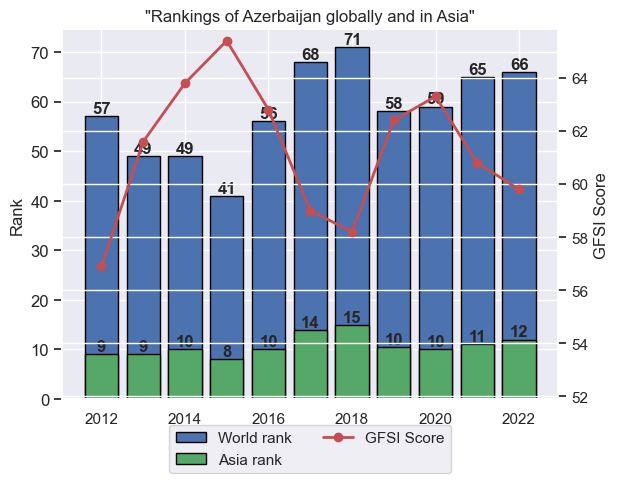

In [16]:
azerbaijan_data = filtered_df[filtered_df['Country'] == 'Azerbaijan']

fig, ax1 = plt.subplots()

bars1 = ax1.bar(azerbaijan_data['Year'], azerbaijan_data['World_Rank'], color='b', label='World rank', edgecolor='black')
bars2 = ax1.bar(azerbaijan_data['Year'], azerbaijan_data['Continent_Rank'], color='g', label='Asia rank', edgecolor='black')

ax1.set_ylabel('Rank')
ax1.set_title('"Rankings of Azerbaijan globally and in Asia"')

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')

plt.yticks(fontsize=12)

ax2 = ax1.twinx()
ax2.plot(azerbaijan_data['Year'], azerbaijan_data['GFSI_Score'], color='r', marker='o', linestyle='-', linewidth=2, label='GFSI Score')

ax2.set_ylabel('GFSI Score')

ax2.set_ylim(bottom=azerbaijan_data['GFSI_Score'].min() - 5)  

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.show()

This code creates a bar chart and a line plot to visualize the rankings and GFSI scores of Azerbaijan globally and in Asia over the years for each of the four categories. The bar chart shows the world rank and Asia rank of Azerbaijan for each category, while the line plot shows the GFSI score for each category. The chart also includes data labels on the bars, a legend, and a second y-axis for the GFSI score.

In [17]:
filtered_df_2 = df_cleaned[df_cleaned['Sub_Category'] == '1) AFFORDABILITY']
filtered_df_2['World_Rank'] = filtered_df_2.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
filtered_df_2['Continent_Rank'] = filtered_df_2.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


filtered_df_2.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\1387532767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['World_Rank'] = filtered_df_2.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\1387532767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['Continent_Rank'] = filtered_df_2.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank,Continent_Rank
113,2012,Category,1) AFFORDABILITY,Algeria,75.8,Middle East and North Africa,48.0,8.0
114,2012,Category,1) AFFORDABILITY,Angola,44.7,Sub-Saharan Africa,94.0,12.5
115,2012,Category,1) AFFORDABILITY,Argentina,77.5,Latin America,40.0,4.0
116,2012,Category,1) AFFORDABILITY,Australia,87.3,Asia and Pacific,15.0,4.0
117,2012,Category,1) AFFORDABILITY,Austria,87,Europe,17.0,13.0


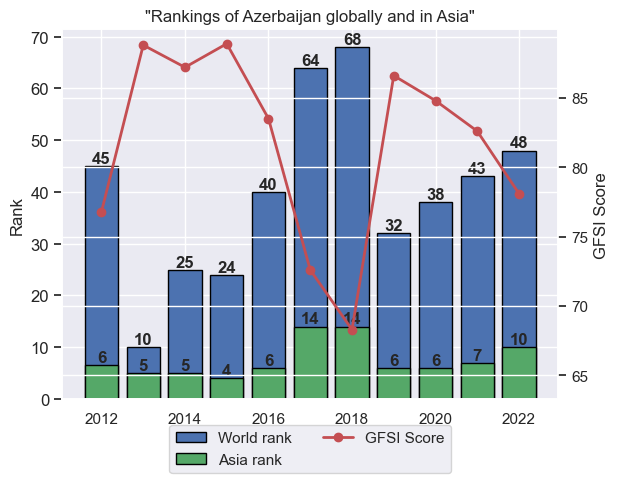

In [18]:
azerbaijan_data_2 = filtered_df_2[filtered_df_2['Country'] == 'Azerbaijan']

fig, ax1 = plt.subplots()

bars1 = ax1.bar(azerbaijan_data_2['Year'], azerbaijan_data_2['World_Rank'], color='b', label='World rank', edgecolor='black')
bars2 = ax1.bar(azerbaijan_data_2['Year'], azerbaijan_data_2['Continent_Rank'], color='g', label='Asia rank', edgecolor='black')

ax1.set_ylabel('Rank')
ax1.set_title('"Rankings of Azerbaijan globally and in Asia"')

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')

plt.yticks(fontsize=12)

ax2 = ax1.twinx()
ax2.plot(azerbaijan_data_2['Year'], azerbaijan_data_2['GFSI_Score'], color='r', marker='o', linestyle='-', linewidth=2, label='GFSI Score')

ax2.set_ylabel('GFSI Score')

ax2.set_ylim(bottom=azerbaijan_data_2['GFSI_Score'].min() - 5)  

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.show()

In [19]:
filtered_df_3 = df_cleaned[df_cleaned['Sub_Category'] == '2) AVAILABILITY']
filtered_df_3['World_Rank'] = filtered_df_3.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
filtered_df_3['Continent_Rank'] = filtered_df_3.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


filtered_df_3.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\3826920590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_3['World_Rank'] = filtered_df_3.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\3826920590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_3['Continent_Rank'] = filtered_df_3.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank,Continent_Rank
1469,2012,Category,2) AVAILABILITY,Algeria,31.6,Middle East and North Africa,108.0,14.0
1470,2012,Category,2) AVAILABILITY,Angola,44.2,Sub-Saharan Africa,82.0,7.0
1471,2012,Category,2) AVAILABILITY,Argentina,49.7,Latin America,63.0,14.0
1472,2012,Category,2) AVAILABILITY,Australia,59.3,Asia and Pacific,33.0,6.0
1473,2012,Category,2) AVAILABILITY,Austria,67.5,Europe,10.0,9.0


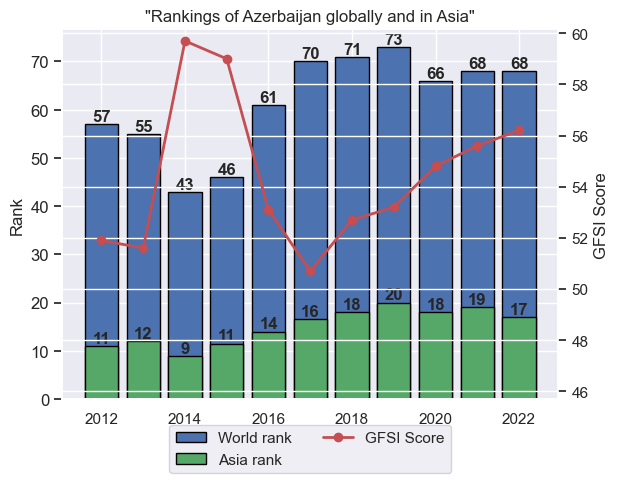

In [20]:
azerbaijan_data_3 = filtered_df_3[filtered_df_3['Country'] == 'Azerbaijan']

fig, ax1 = plt.subplots()

bars1 = ax1.bar(azerbaijan_data_3['Year'], azerbaijan_data_3['World_Rank'], color='b', label='World rank', edgecolor='black')
bars2 = ax1.bar(azerbaijan_data_3['Year'], azerbaijan_data_3['Continent_Rank'], color='g', label='Asia rank', edgecolor='black')

ax1.set_ylabel('Rank')
ax1.set_title('"Rankings of Azerbaijan globally and in Asia"')

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')

plt.yticks(fontsize=12)

ax2 = ax1.twinx()
ax2.plot(azerbaijan_data_3['Year'], azerbaijan_data_3['GFSI_Score'], color='r', marker='o', linestyle='-', linewidth=2, label='GFSI Score')

ax2.set_ylabel('GFSI Score')

ax2.set_ylim(bottom=azerbaijan_data_3['GFSI_Score'].min() - 5)  

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.show()

In [21]:
filtered_df_4 = df_cleaned[df_cleaned['Sub_Category'] == '3) QUALITY AND SAFETY']
filtered_df_4['World_Rank'] = filtered_df_4.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
filtered_df_4['Continent_Rank'] = filtered_df_4.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


filtered_df_4.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\2544030255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_4['World_Rank'] = filtered_df_4.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\2544030255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_4['Continent_Rank'] = filtered_df_4.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank,Continent_Rank
5198,2012,Category,3) QUALITY AND SAFETY,Algeria,51.4,Middle East and North Africa,81.0,14.0
5199,2012,Category,3) QUALITY AND SAFETY,Angola,44.5,Sub-Saharan Africa,101.0,18.5
5200,2012,Category,3) QUALITY AND SAFETY,Argentina,78.3,Latin America,17.0,1.0
5201,2012,Category,3) QUALITY AND SAFETY,Australia,81.4,Asia and Pacific,14.0,1.0
5202,2012,Category,3) QUALITY AND SAFETY,Austria,87.2,Europe,2.0,1.0


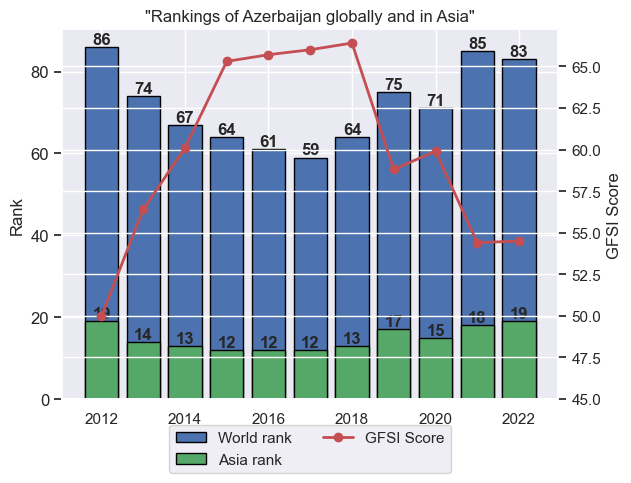

In [22]:
azerbaijan_data_4 = filtered_df_4[filtered_df_4['Country'] == 'Azerbaijan']

fig, ax1 = plt.subplots()

bars1 = ax1.bar(azerbaijan_data_4['Year'], azerbaijan_data_4['World_Rank'], color='b', label='World rank', edgecolor='black')
bars2 = ax1.bar(azerbaijan_data_4['Year'], azerbaijan_data_4['Continent_Rank'], color='g', label='Asia rank', edgecolor='black')

ax1.set_ylabel('Rank')
ax1.set_title('"Rankings of Azerbaijan globally and in Asia"')

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')

plt.yticks(fontsize=12)

ax2 = ax1.twinx()
ax2.plot(azerbaijan_data_4['Year'], azerbaijan_data_4['GFSI_Score'], color='r', marker='o', linestyle='-', linewidth=2, label='GFSI Score')

ax2.set_ylabel('GFSI Score')

ax2.set_ylim(bottom=azerbaijan_data_4['GFSI_Score'].min() - 5) 

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.show()

In [23]:
filtered_df_5 = df_cleaned[df_cleaned['Sub_Category'] == '4) SUSTAINABILITY AND ADAPTATION']
filtered_df_5['World_Rank'] = filtered_df_5.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
filtered_df_5['Continent_Rank'] = filtered_df_5.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


filtered_df_5.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\2105464529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_5['World_Rank'] = filtered_df_5.groupby('Year')['GFSI_Score'].rank(ascending=False, method='min')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26108\2105464529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_5['Continent_Rank'] = filtered_df_5.groupby(['Year', 'Continent'])['GFSI_Score'].rank(ascending=False)


,Year,Category,Sub_Category,Country,GFSI_Score,Continent,World_Rank,Continent_Rank
7345,2012,Category,4) SUSTAINABILITY AND ADAPTATION,Algeria,37,Middle East and North Africa,92.0,12.0
7346,2012,Category,4) SUSTAINABILITY AND ADAPTATION,Angola,37.5,Sub-Saharan Africa,91.0,20.0
7347,2012,Category,4) SUSTAINABILITY AND ADAPTATION,Argentina,45.5,Latin America,45.0,9.0
7348,2012,Category,4) SUSTAINABILITY AND ADAPTATION,Australia,51.2,Asia and Pacific,23.0,4.0
7349,2012,Category,4) SUSTAINABILITY AND ADAPTATION,Austria,52.3,Europe,21.0,12.0


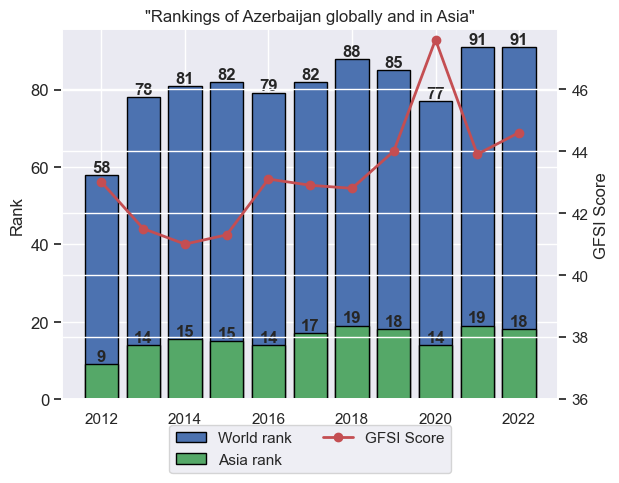

In [24]:
azerbaijan_data_5 = filtered_df_5[filtered_df_5['Country'] == 'Azerbaijan']

fig, ax1 = plt.subplots()

bars1 = ax1.bar(azerbaijan_data_5['Year'], azerbaijan_data_5['World_Rank'], color='b', label='World rank', edgecolor='black')
bars2 = ax1.bar(azerbaijan_data_5['Year'], azerbaijan_data_5['Continent_Rank'], color='g', label='Asia rank', edgecolor='black')

ax1.set_ylabel('Rank')
ax1.set_title('"Rankings of Azerbaijan globally and in Asia"')

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom', weight='bold')

plt.yticks(fontsize=12)

ax2 = ax1.twinx()
ax2.plot(azerbaijan_data_5['Year'], azerbaijan_data_5['GFSI_Score'], color='r', marker='o', linestyle='-', linewidth=2, label='GFSI Score')

ax2.set_ylabel('GFSI Score')

ax2.set_ylim(bottom=azerbaijan_data_5['GFSI_Score'].min() - 5)  

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.show()

This code creates a line plot to compare the GFSI scores of Azerbaijan with those of other countries over the years. Each country is represented by a different line with markers for each data point. The plot includes a legend, gridlines, and labels for the x and y axes.

In [25]:
df_1 = GFSI_Data_Table_Scores_2012_2022.loc[GFSI_Data_Table_Scores_2012_2022['GFSI_İndex'] == 'FOOD SECURITY ENVIRONMENT']

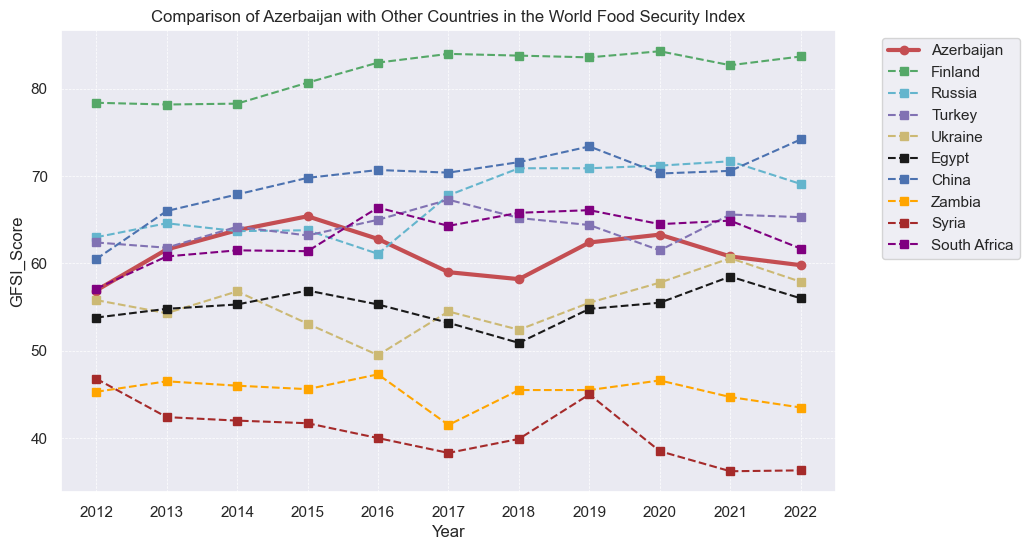

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_1['Year'], df_1['Azerbaijan'], label='Azerbaijan', marker='o', linestyle='-', color='r', linewidth=3)
plt.plot(df_1['Year'], df_1['Finland'], label='Finland', marker='s', linestyle='--', color='g')
plt.plot(df_1['Year'], df_1['Russia'], label='Russia', marker='s', linestyle='--', color='c')
plt.plot(df_1['Year'], df_1['Turkey'], label='Turkey', marker='s', linestyle='--', color='m')
plt.plot(df_1['Year'], df_1['Ukraine'], label='Ukraine', marker='s', linestyle='--', color='y')
plt.plot(df_1['Year'], df_1['Egypt'], label='Egypt', marker='s', linestyle='--', color='k')
plt.plot(df_1['Year'], df_1['China'], label='China', marker='s', linestyle='--', color='b')
plt.plot(df_1['Year'], df_1['Zambia'], label='Zambia', marker='s', linestyle='--', color='orange')
plt.plot(df_1['Year'], df_1['Syria'], label='Syria', marker='s', linestyle='--', color='brown')
plt.plot(df_1['Year'], df_1['South Africa'], label='South Africa', marker='s', linestyle='--', color='purple')
plt.xlabel('Year')
plt.ylabel('GFSI_Score')
plt.title('Comparison of Azerbaijan with Other Countries in the World Food Security Index')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(df_1['Year'])
plt.show()

This code creates a line plot to compare the GFSI scores of Azerbaijan with the world average (mean) over the years. Azerbaijan is represented by a blue line with circular markers, while the world average is represented by a red dashed line with square markers. The plot includes labels for the x and y axes, a title, a legend, and gridlines.

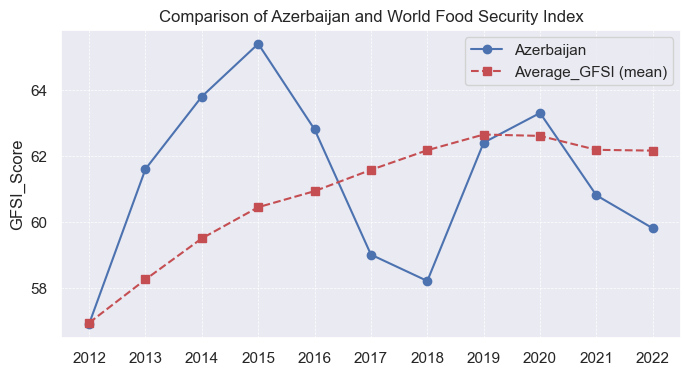

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(df_1['Year'], df_1['Azerbaijan'], label='Azerbaijan', marker='o', linestyle='-', color='b')
plt.plot(df_1['Year'], df_1['Average (mean)'], label='Average_GFSI (mean)', marker='s', linestyle='--', color='r')
plt.ylabel('GFSI_Score')
plt.title('Comparison of Azerbaijan and World Food Security Index')
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(df_1['Year'])
plt.show()

This code creates four subplots, each showing the comparison of Azerbaijan's GFSI scores with the world average (mean) for different categories of the GFSI index. Each subplot represents one of the categories: AFFORDABILITY, AVAILABILITY, QUALITY AND SAFETY, and SUSTAINABILITY AND ADAPTATION. Azerbaijan's scores are plotted with blue lines and circular markers, while the world average is plotted with red dashed lines and square markers. The subplots include titles indicating the category, labels for the x and y axes, legends, and gridlines.

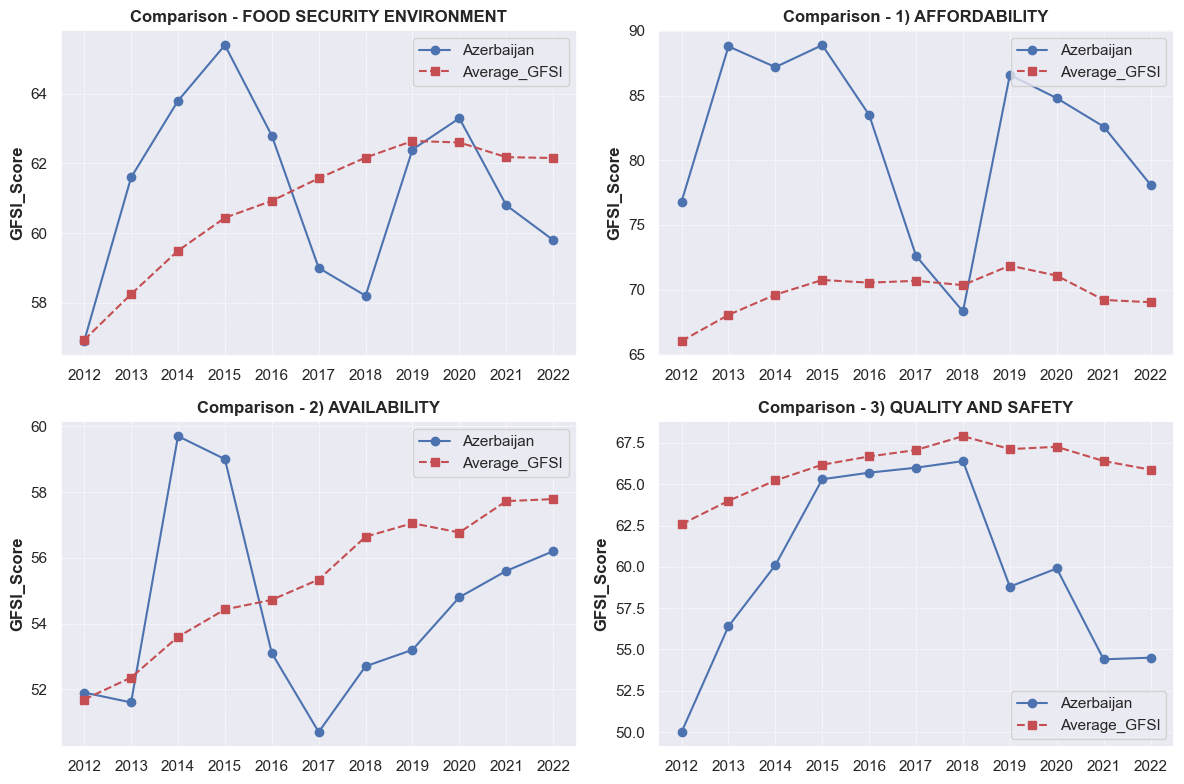

In [28]:
categories = ['FOOD SECURITY ENVIRONMENT' , '1) AFFORDABILITY', '2) AVAILABILITY', '3) QUALITY AND SAFETY', '4) SUSTAINABILITY AND ADAPTATION']
category_data = {}

for category in categories:
    category_data[category] = GFSI_Data_Table_Scores_2012_2022[GFSI_Data_Table_Scores_2012_2022['GFSI_İndex'] == category]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, (category, data) in zip(axs.flat, category_data.items()):
    ax.plot(data['Year'], data['Azerbaijan'], label='Azerbaijan', marker='o', linestyle='-', color='b')
    ax.plot(data['Year'], data['Average (mean)'], label='Average_GFSI', marker='s', linestyle='--', color='r')
    ax.set_title(f'Comparison - {category}', fontsize=12, fontweight='bold') 
    ax.set_ylabel('GFSI_Score', fontweight='bold')  
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xticks(data['Year'])

plt.tight_layout()
plt.show()

This code creates a line plot showing the trends of different categories of the GFSI index over the years for Azerbaijan. Each category is represented by a different colored line with markers. The y-axis represents the GFSI score, and the x-axis represents the years from 2012 to 2022. The plot includes labels for the axes, a title, a legend, and gridlines.

In [29]:
df_2 = GFSI_Data_Table_Scores_2012_2022.loc[GFSI_Data_Table_Scores_2012_2022['Category'] == 'Category']

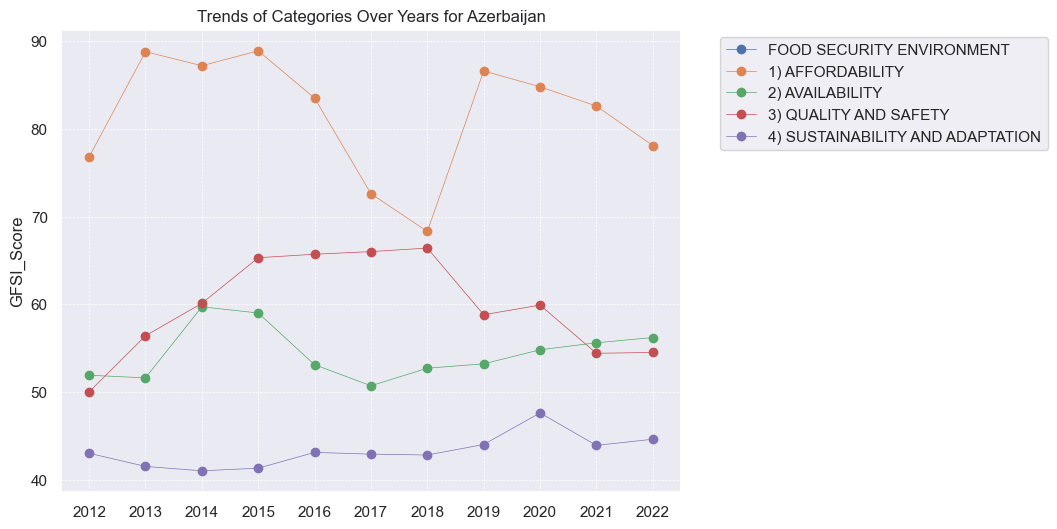

In [30]:
plt.figure(figsize=(8, 6))

for category in categories:
    df_category = df_2[df_2['GFSI_İndex'] == category]
    plt.plot(df_category['Year'], df_category['Azerbaijan'], label=category, marker='o', linestyle='-', linewidth=0.5)

plt.ylabel('GFSI_Score')
plt.title('Trends of Categories Over Years for Azerbaijan')

plt.xticks(range(2012, 2023))  

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

This code creates a bar chart comparing Azerbaijan's scores with the average mean scores for QUALITY AND SAFETY indicator & sub-indices in 2022. The chart displays two sets of bars, one for Azerbaijan and one for the average mean scores, with annotations showing the exact score value on each bar. The x-axis represents the indicators and sub-indices, and the y-axis represents the scores. The plot includes labels for the axes, a title, a legend, and rotated x-axis labels for better readability.

In [31]:
df_3 = GFSI_Data_Table_Scores_2012_2022

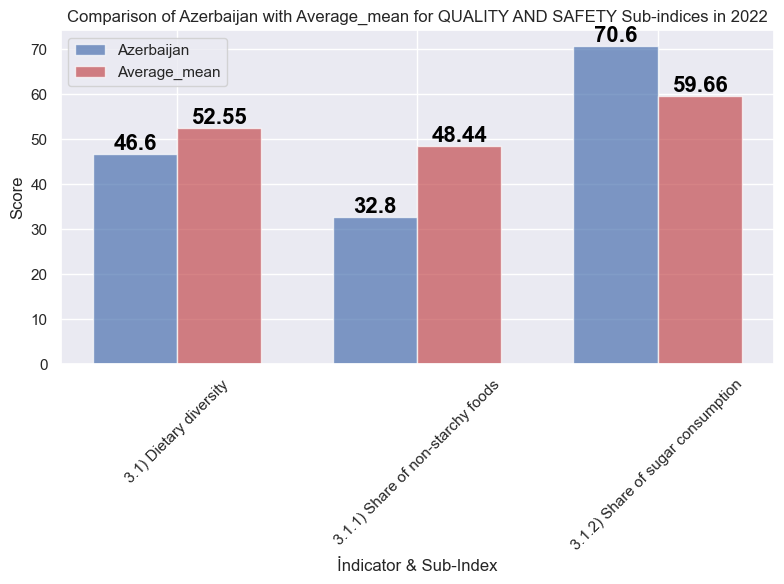

In [32]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^3\.1')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=16, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=16, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for QUALITY AND SAFETY Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45)  


plt.tight_layout() 
plt.show()

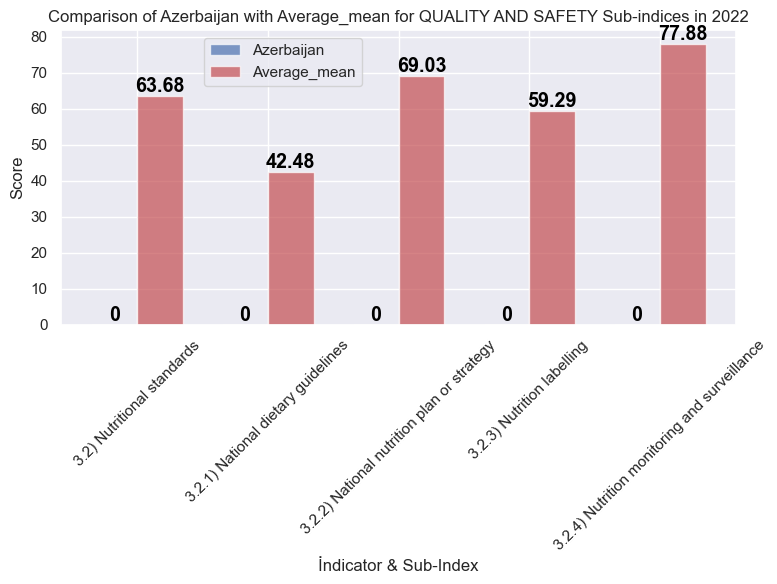

In [33]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^3\.2')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for QUALITY AND SAFETY Sub-indices in 2022')
plt.legend()
plt.legend(bbox_to_anchor=(0.2, 1), loc='upper left')

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45)  
plt.tight_layout() 
plt.show()

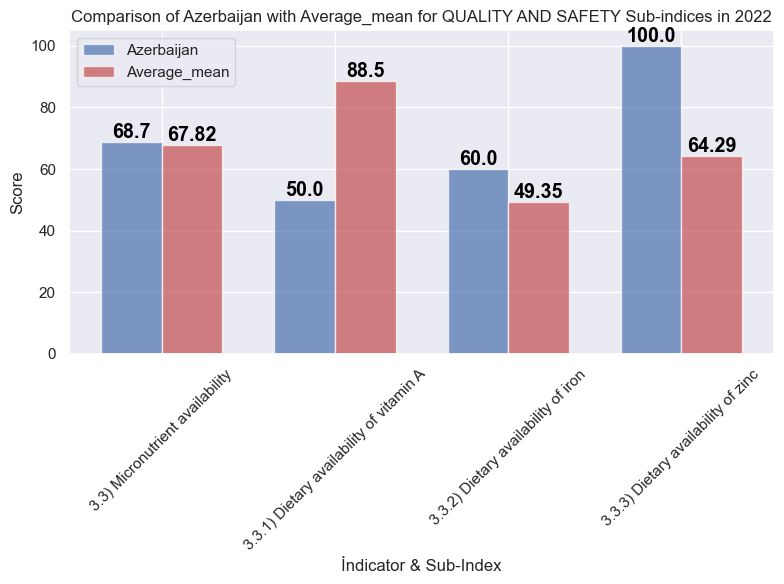

In [34]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^3\.3')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')


plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for QUALITY AND SAFETY Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45) 

plt.tight_layout()
plt.show()

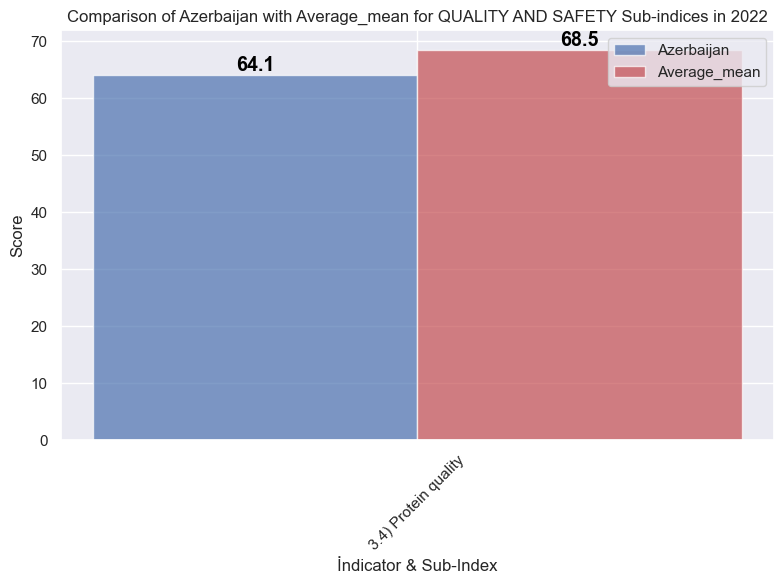

In [35]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^3\.4')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for QUALITY AND SAFETY Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45)  

plt.tight_layout()  
plt.show()

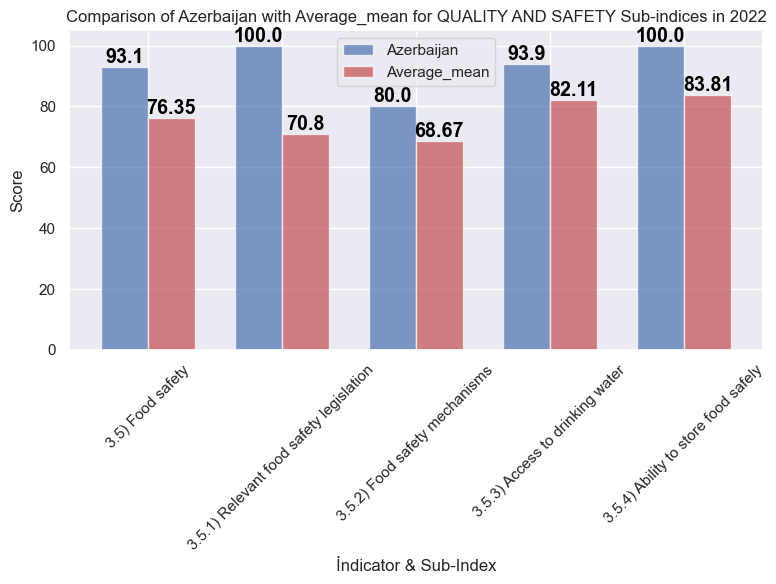

In [36]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^3\.5')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for QUALITY AND SAFETY Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45) 

plt.tight_layout()  
plt.show()

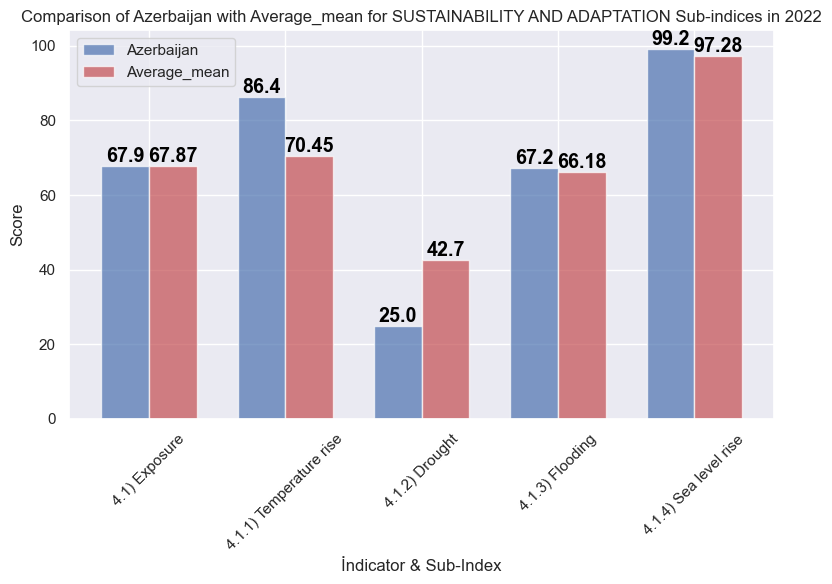

In [37]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^4\.1')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for SUSTAINABILITY AND ADAPTATION Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45)  

plt.tight_layout()  
plt.show()

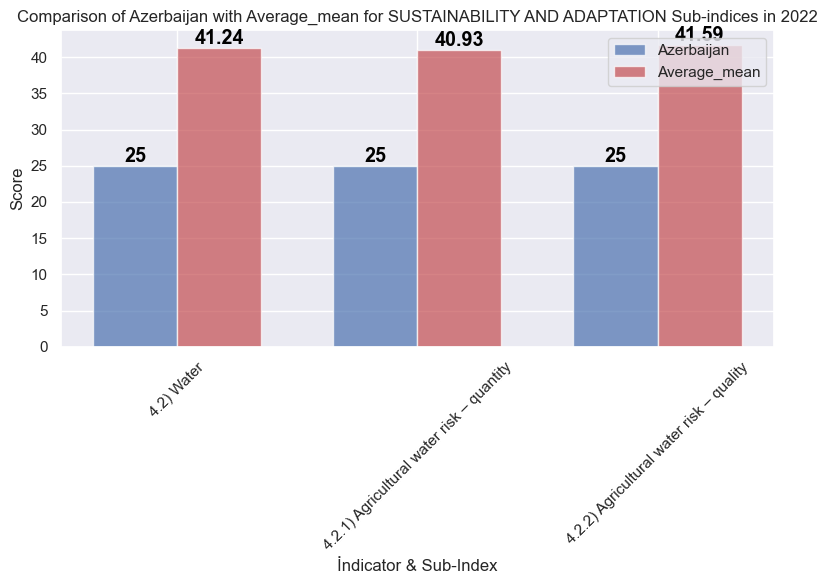

In [38]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^4\.2')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for SUSTAINABILITY AND ADAPTATION Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45)  

plt.tight_layout() 
plt.show()

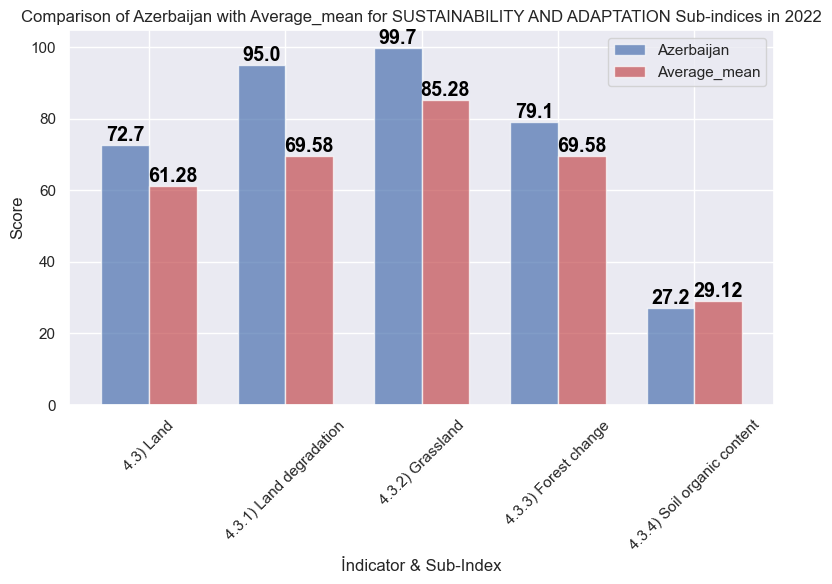

In [39]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^4\.3')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for SUSTAINABILITY AND ADAPTATION Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45)  

plt.tight_layout() 
plt.show()

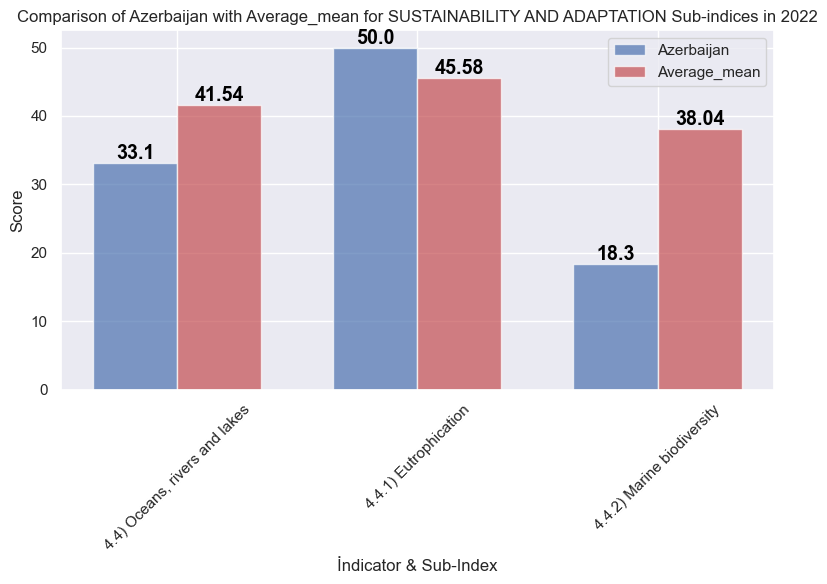

In [40]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^4\.4')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')
    
plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for SUSTAINABILITY AND ADAPTATION Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45)  

plt.tight_layout()  
plt.show()

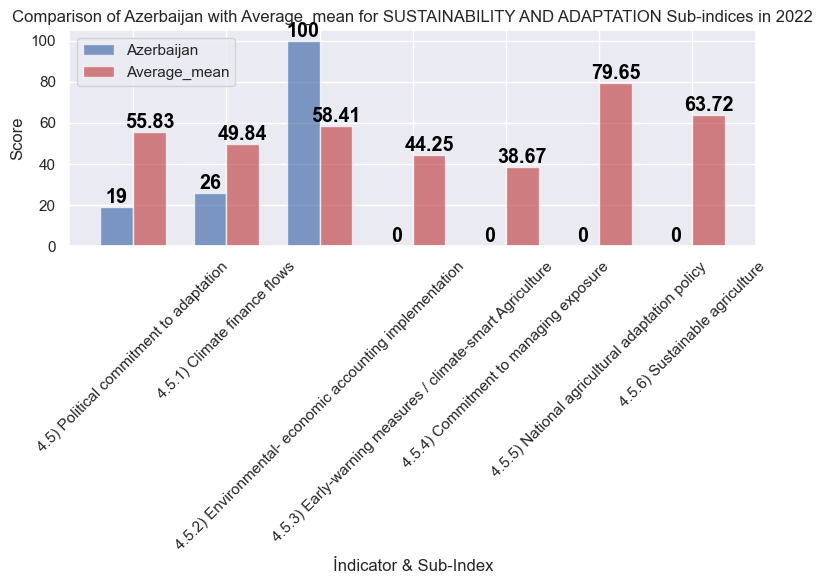

In [41]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^4\.5')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for SUSTAINABILITY AND ADAPTATION Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45) 

plt.tight_layout() 
plt.show()

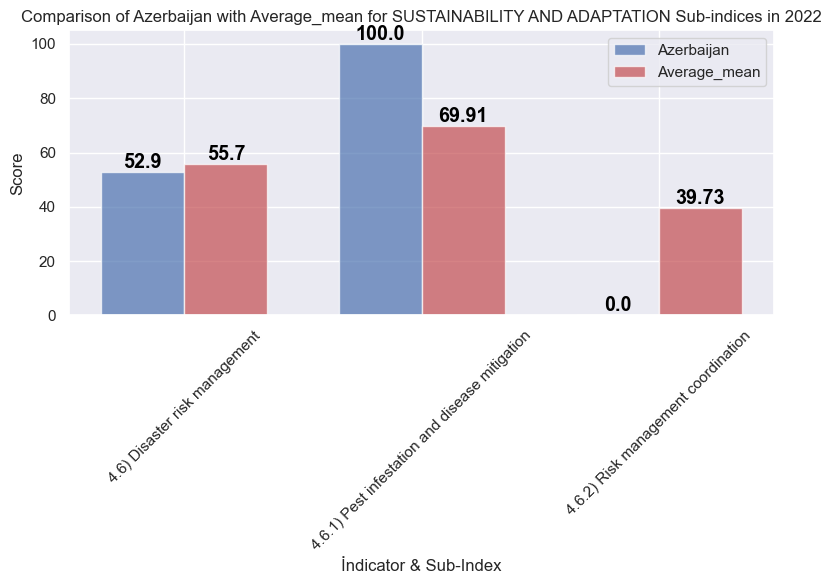

In [42]:
df_sub_indices_2022 = df_3[(df_3['GFSI_İndex'].str.contains('^4\.6')) & (df_3['Year'] == 2022)]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_sub_indices_2022))

bars1 = plt.bar(index, df_sub_indices_2022['Azerbaijan'], bar_width, label='Azerbaijan', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, df_sub_indices_2022['Average (mean)'], bar_width, label='Average_mean', color='r', alpha=0.7)

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=14.2, fontweight='bold', color='black')

plt.xlabel('İndicator & Sub-Index')
plt.ylabel('Score')
plt.title('Comparison of Azerbaijan with Average_mean for SUSTAINABILITY AND ADAPTATION Sub-indices in 2022')
plt.legend()

plt.xticks(index + bar_width / 2, df_sub_indices_2022['GFSI_İndex'], rotation=45) 

plt.tight_layout() 
plt.show()